# Version I - training with dataset only

### Imports and initial setup

In [2]:
import import_ipynb

from InitialSetup import dataset, dataset_length, BATCH_SIZE, show_batch, prepare_callbacks, model_VI, show_history, test_dataset

importing Jupyter notebook from InitialSetup.ipynb
Num GPUs Available:  1
Total images in validatation dataset:  12630
(32, 32, 3) (43,)
Total images in dataset:  39209


### Preparing training, validation and test datasets

In [2]:

dataSolo = dataset
dataSolo = dataSolo.cache()
dataSolo = dataSolo.shuffle(buffer_size = dataset_length)
dataSolo = dataSolo.prefetch(buffer_size=dataset_length)
dataSolo = dataSolo.batch(batch_size=BATCH_SIZE)
dataSolo = dataSolo.repeat()

In [3]:
train_size = int(0.8* dataset_length)
val_size = int(0.2* dataset_length)

train_dataset = dataSolo.take(train_size)
val_dataset = dataSolo.skip(train_size)


### Show a batch of training images

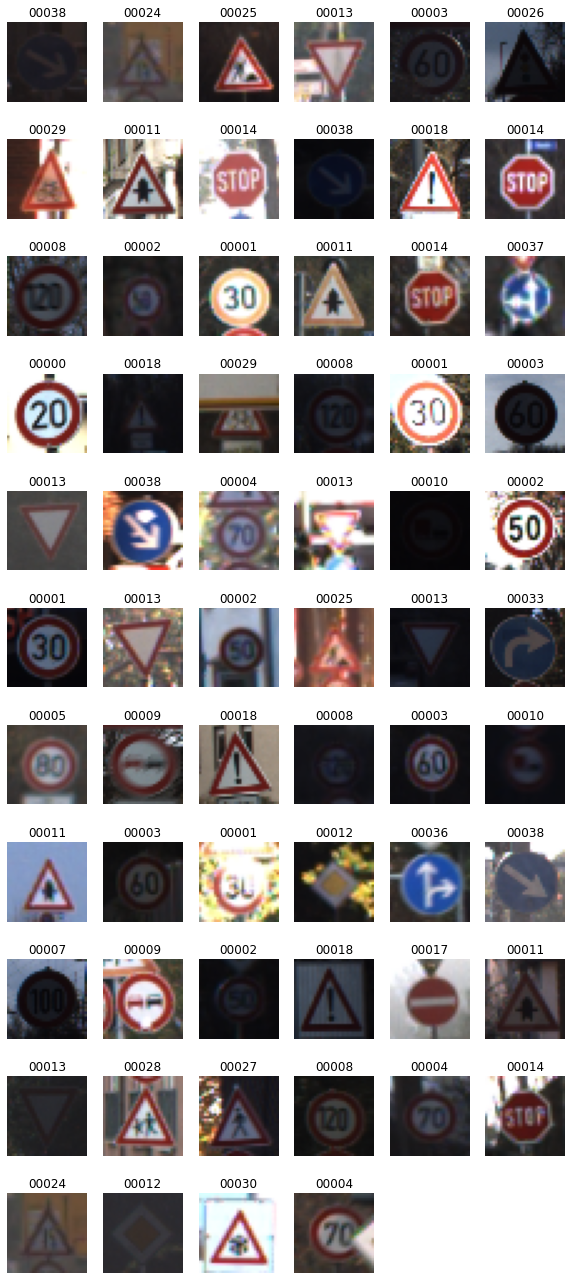

In [4]:
image_batch, label_batch = next(iter(train_dataset))        
show_batch(image_batch, label_batch.numpy())

### Show a batch of validation images

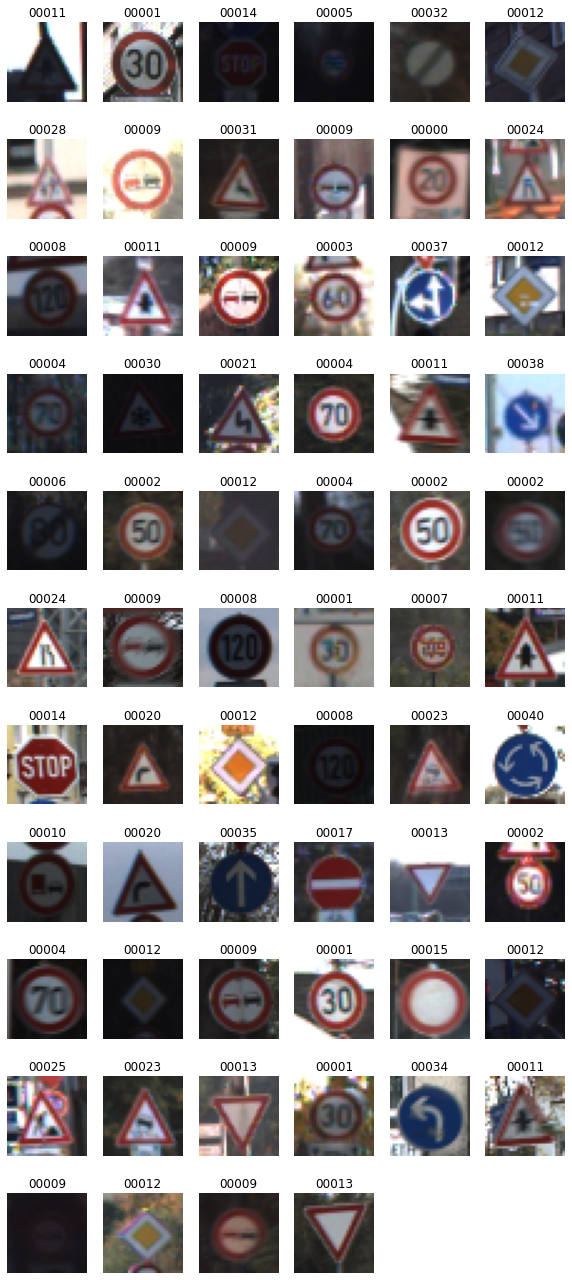

In [5]:
image_batch, label_batch = next(iter(val_dataset))        
show_batch(image_batch, label_batch.numpy())

### Setup model and save place

In [3]:
modelV1 = model_VI(43, 32, 3)

file_pathV1 = './Networks/JustDataset.ckpt'

callbacksV1 = prepare_callbacks(file_pathV1)

### Train model

In [6]:
historyV1 = modelV1.fit(train_dataset, steps_per_epoch = train_size/BATCH_SIZE,
          epochs=20, 
          validation_data = val_dataset,
          validation_steps = val_size/BATCH_SIZE,
          callbacks = callbacksV1)

Epoch 1/20
490/490 [==============================] - 17s 30ms/step - loss: 3.4138 - accuracy: 0.1827 - val_loss: 1.7687 - val_accuracy: 0.5644

Epoch 00001: val_accuracy improved from -inf to 0.56441, saving model to ./Networks\JustDataset.ckpt
Epoch 2/20
490/490 [==============================] - 15s 30ms/step - loss: 1.1866 - accuracy: 0.6464 - val_loss: 0.2206 - val_accuracy: 0.9480

Epoch 00002: val_accuracy improved from 0.56441 to 0.94804, saving model to ./Networks\JustDataset.ckpt
Epoch 3/20
490/490 [==============================] - 14s 29ms/step - loss: 0.5034 - accuracy: 0.8457 - val_loss: 0.0931 - val_accuracy: 0.9787

Epoch 00003: val_accuracy improved from 0.94804 to 0.97866, saving model to ./Networks\JustDataset.ckpt
Epoch 4/20
490/490 [==============================] - 14s 29ms/step - loss: 0.2833 - accuracy: 0.9164 - val_loss: 0.0481 - val_accuracy: 0.9889

Epoch 00004: val_accuracy improved from 0.97866 to 0.98895, saving model to ./Networks\JustDataset.ckpt
Epoch 5

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


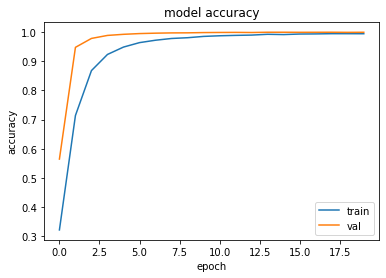

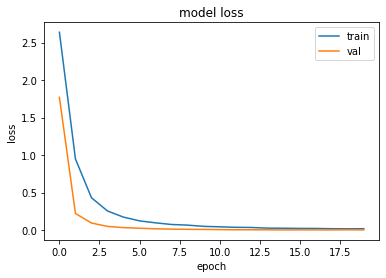

In [7]:
show_history(historyV1)

### Evaluate Model

In [8]:
modelV1.load_weights(file_pathV1)

evalV1 = modelV1.evaluate(test_dataset, verbose=2)
valV1 = modelV1.evaluate(val_dataset, steps = val_size/BATCH_SIZE, verbose=2)

198/198 - 3s - loss: 0.0707 - accuracy: 0.9787
122/122 - 5s - loss: 0.0029 - accuracy: 0.9997
